# Learn AlexNet architecture from scratch with Pytorch

This is my first model (AlexNet architecture) in Pytorch.

The link of the paper is : https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf


From https://cs231n.github.io/convolutional-networks/

It said that : if you read the actual paper it claims that the input images were 224x224, which is surely incorrect because (224 - 11)/4 + 1 is quite clearly not an integer.

This is why i have take 227x227.

So we get the following picture of the architecture :

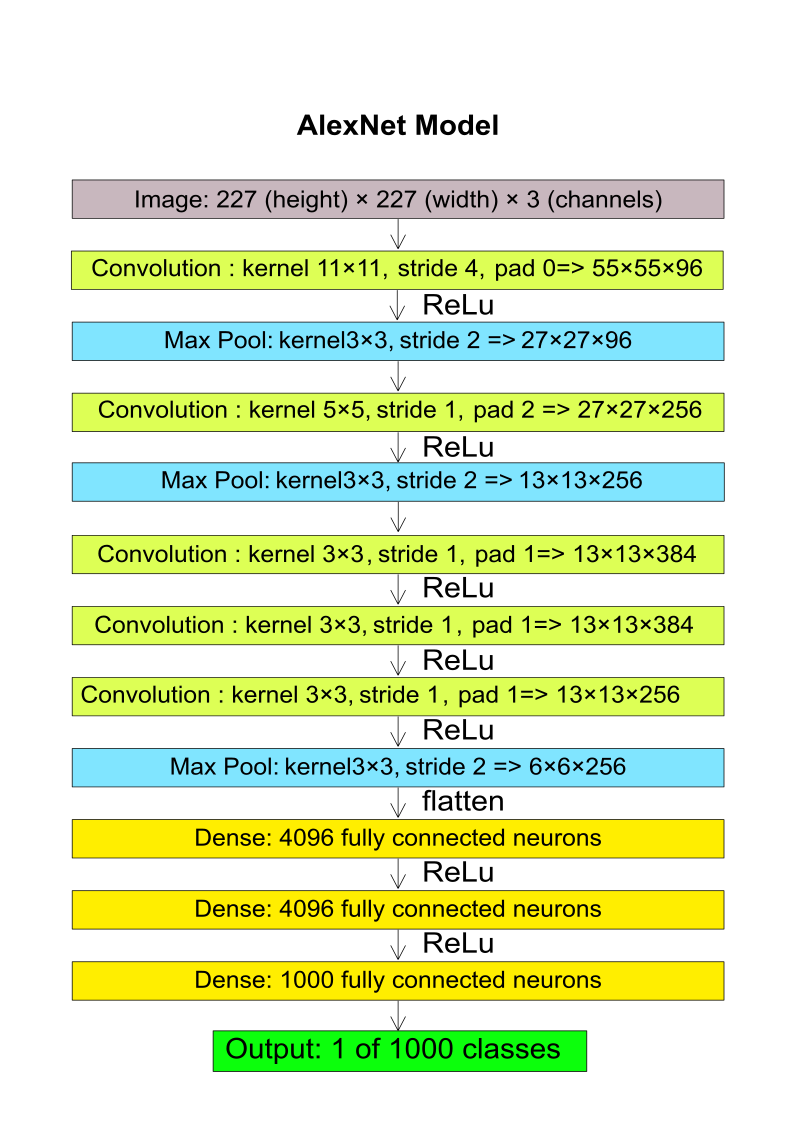

# With Pytorch

### Without Softmax in the architecture

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary

In [2]:
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 1.10.0


In [3]:
class AlexNet_1(nn.Module):
    def __init__(self, num_classes: int = 1000):
        super(AlexNet_1, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels= 96, kernel_size= 11, stride=4, padding=0 )
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride= 1, padding= 2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2)
        self.relu = nn.ReLU(inplace = True)
        
        self.fc1  = nn.Linear(in_features = 256 * 6 * 6, out_features = 4096)
        self.fc2  = nn.Linear(in_features = 4096, out_features = 4096)
        self.fc3  = nn.Linear(in_features = 4096, out_features = num_classes)

    def forward(self,x):
        
        #1st Convolutional Layer 
        x = self.conv1(x)
        x = self.relu(x)
        
        x = self.maxpool(x)
        
        #2nd Convolutional Layer
        x = self.conv2(x)
        x = self.relu(x)

        x = self.maxpool(x)
        
        #3rd Convolutional Layer
        x = self.conv3(x)
        x = self.relu(x)
        
        #4th Convolutional Layer
        x = self.conv4(x)
        x = self.relu(x)
        
        #5th Convolutional Layer
        x = self.conv5(x)
        x = self.relu(x)
        
        x = self.maxpool(x)
        
        #Passing it to a Fully Connected layer
        x = torch.flatten(x, 1)   #x = x.reshape(x.shape[0], -1)
        
        # 1st Fully Connected Layer
        x = self.fc1(x)
        x = self.relu(x)
        
        #2nd Fully Connected Layer
        x = self.fc2(x)
        x = self.relu(x)
        
        #Output Layer
        x = self.fc3(x)
        
        return x

In [4]:
dev=torch.device("cuda") 

model_1 = AlexNet_1(num_classes = 1000).to(dev)
print(summary(model_1,(3,227,227)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
           Linear-14                 [-

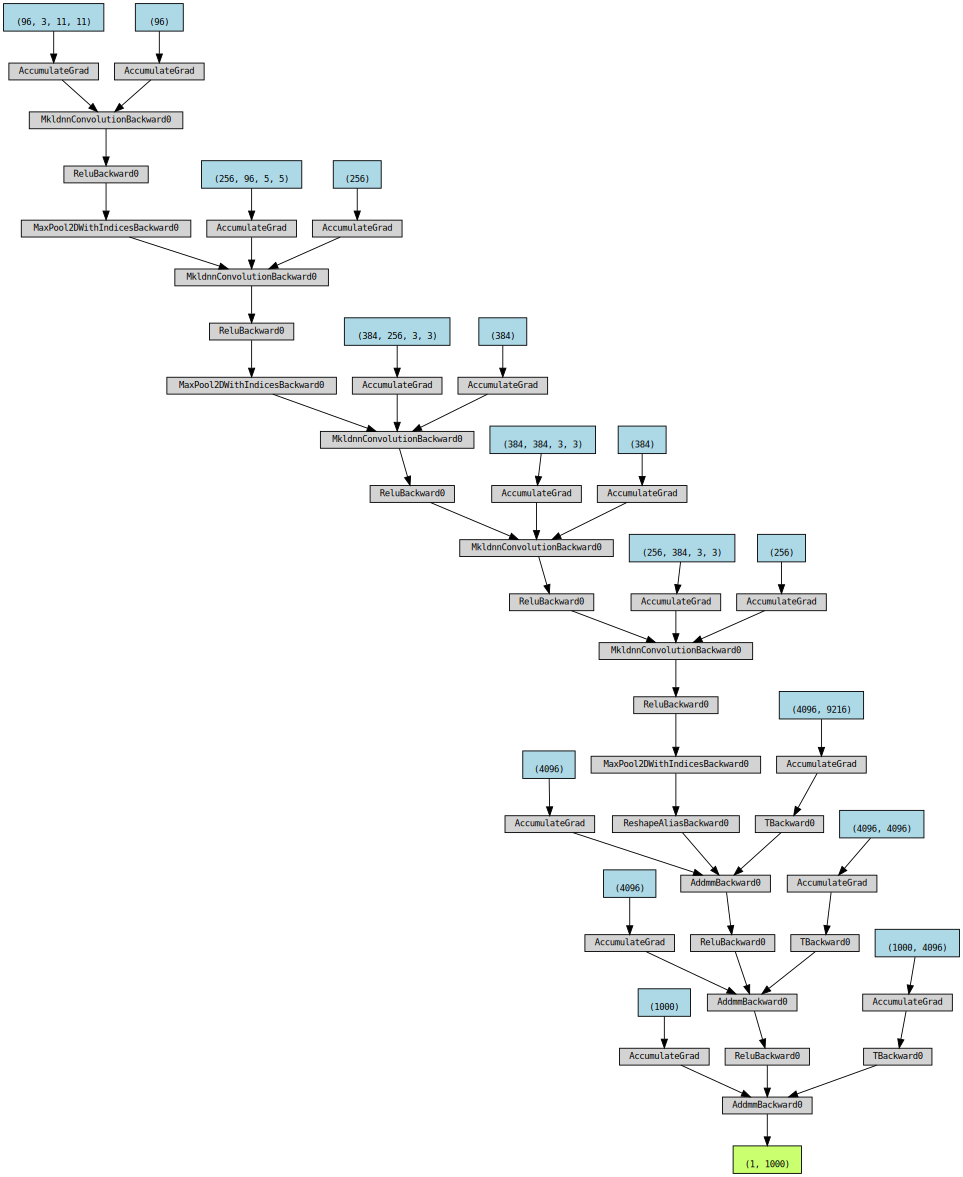

In [5]:
from torchviz import make_dot

x = torch.randn(1, 3, 227, 227)

model_1_cpu = AlexNet_1(num_classes = 1000)
model_1_cpu_out = model_1_cpu(x)

#g = make_dot(out, params=None)
#g.view()
make_dot(model_1_cpu_out, params = None)

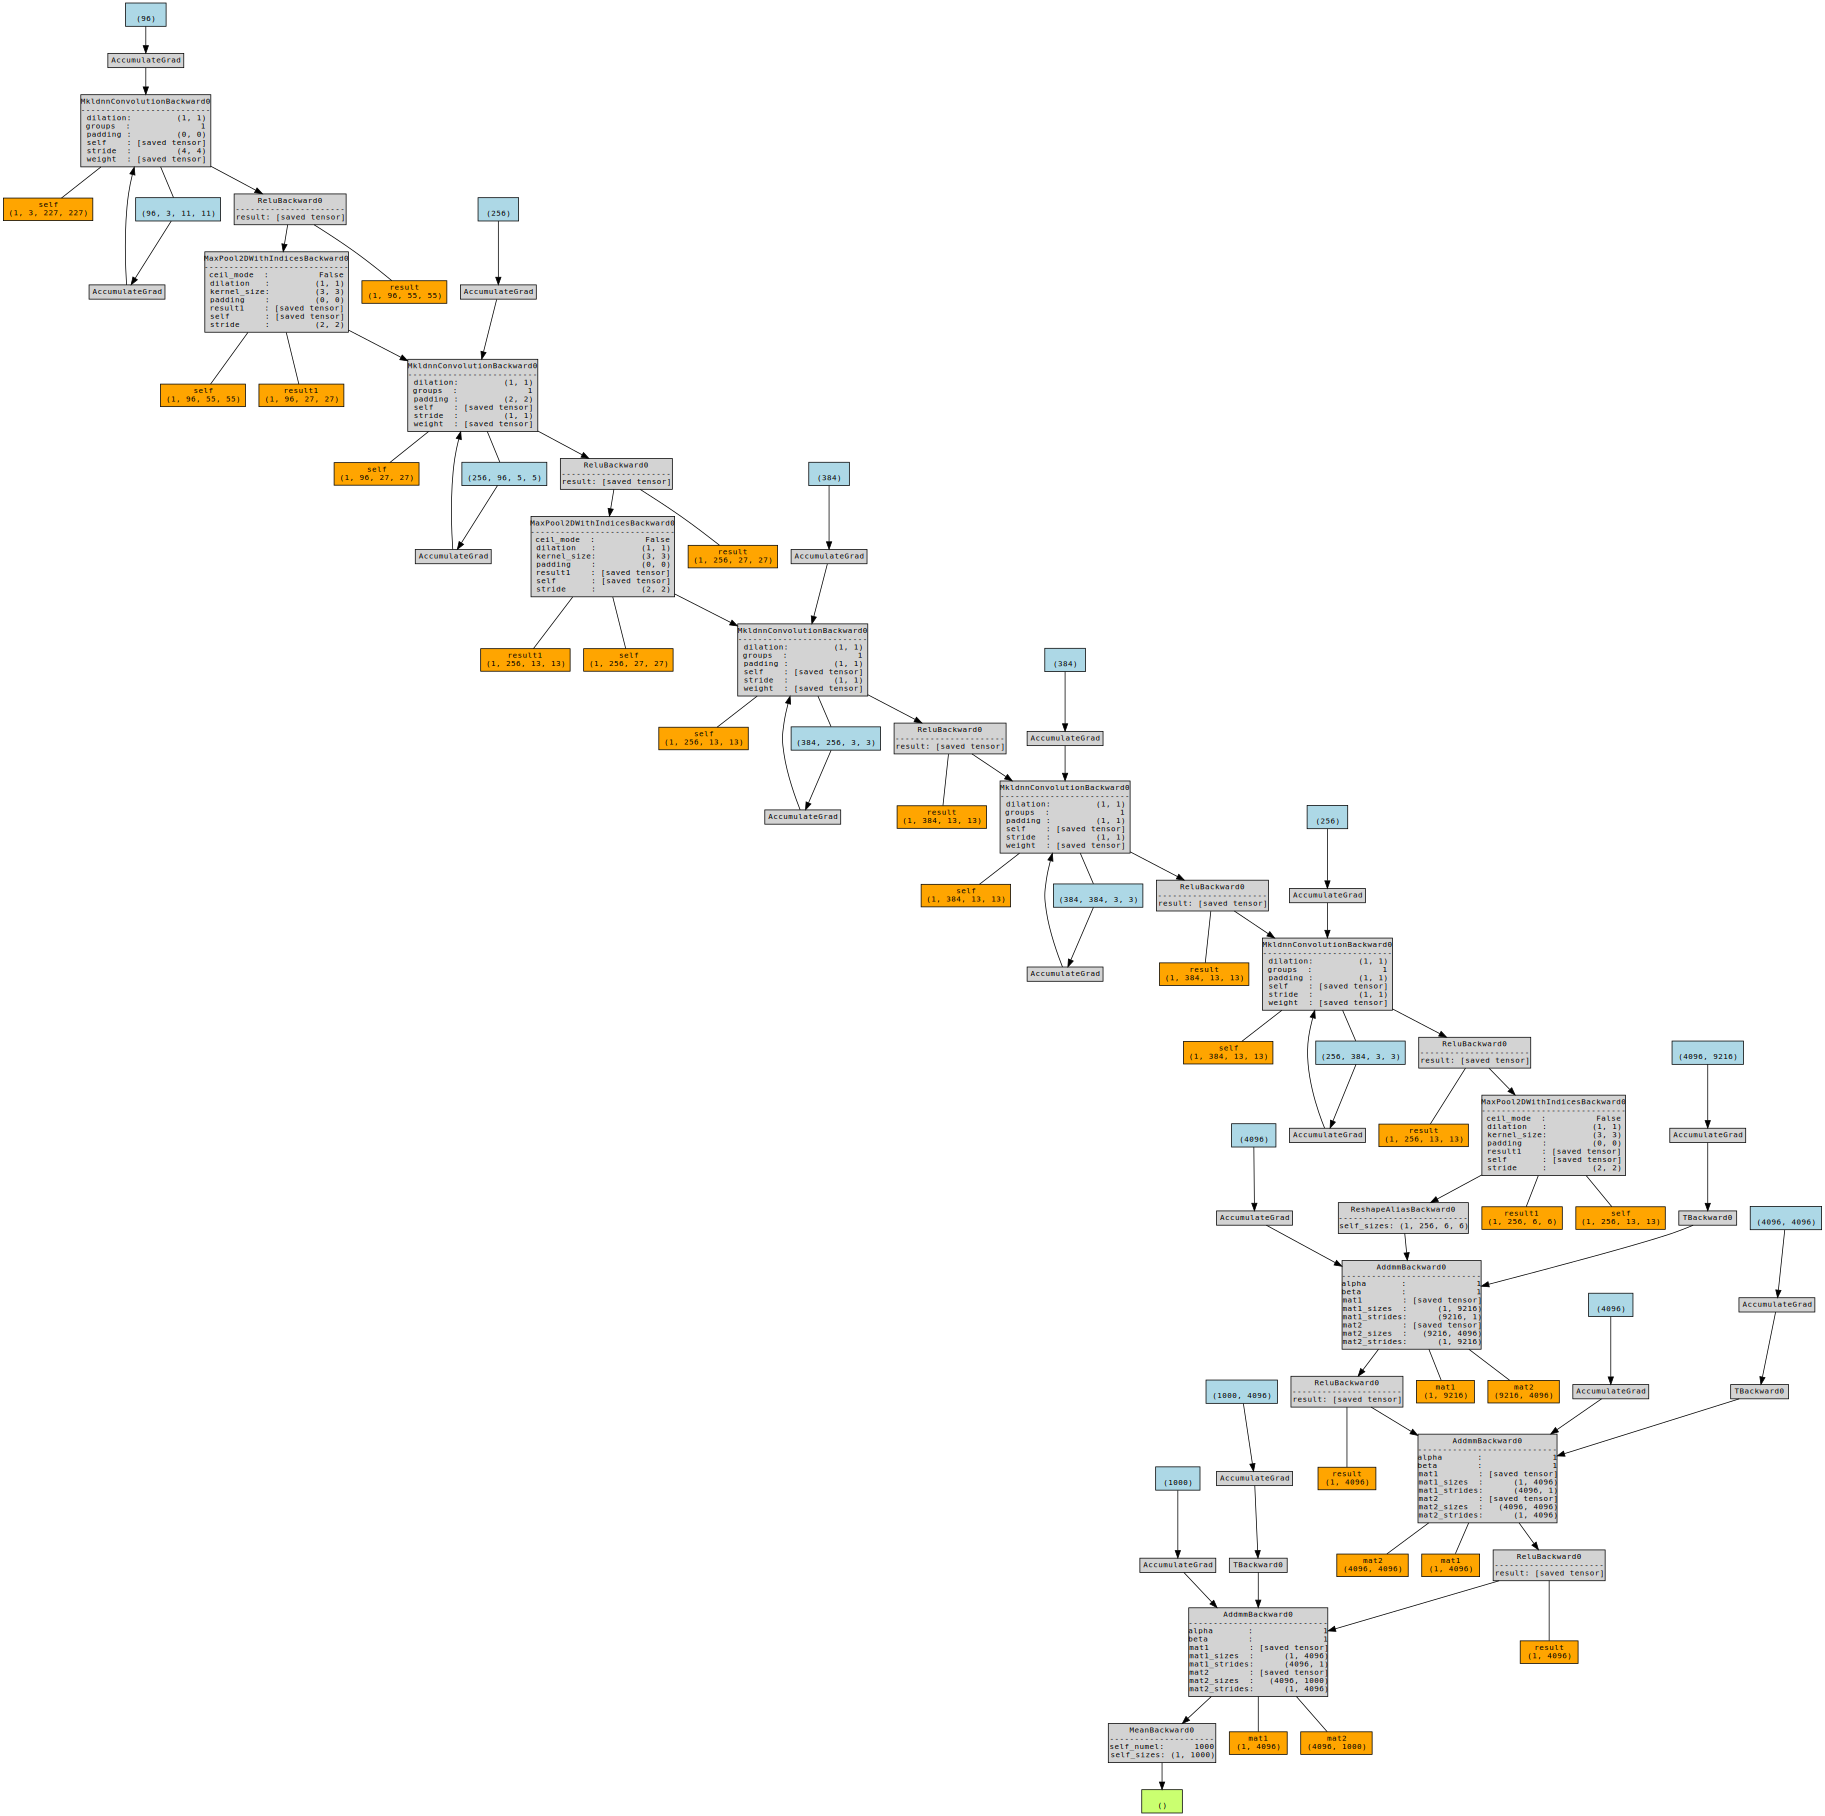

In [6]:
make_dot(model_1_cpu_out.mean(), params = None, show_attrs = True, show_saved = True)

# With Pytorch

### Add Softmax in the architecture

In [7]:
class AlexNet_2(nn.Module):
    def __init__(self, num_classes: int = 1000):
        super(AlexNet_2, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels= 96, kernel_size= 11, stride=4, padding=0 )
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride= 1, padding= 2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.relu = nn.ReLU(inplace = True)
        
        self.fc1  = nn.Linear(in_features = 256 * 6 * 6, out_features = 4096)
        self.fc2  = nn.Linear(in_features = 4096, out_features = 4096)
        self.fc3  = nn.Linear(in_features = 4096, out_features = 1000)
        self.fc4  = nn.Linear(in_features = 1000, out_features = num_classes)

        self.softmax = nn.Softmax(dim=1)

    def forward(self,x):
        
        #1st Convolutional Layer 
        x = self.conv1(x)
        x = self.relu(x)
        
        x = self.maxpool(x)
        
        #2nd Convolutional Layer
        x = self.conv2(x)
        x = self.relu(x)

        x = self.maxpool(x)
        
        #3rd Convolutional Layer
        x = self.conv3(x)
        x = self.relu(x)
        
        #4th Convolutional Layer
        x = self.conv4(x)
        x = self.relu(x)
        
        #5th Convolutional Layer
        x = self.conv5(x)
        x = self.relu(x)
        
        x = self.maxpool(x)
        
        #Passing it to a Fully Connected layer
        x = torch.flatten(x, 1)   #x = x.reshape(x.shape[0], -1)
        
        # 1st Fully Connected Layer
        x = self.fc1(x)
        x = self.relu(x)
        
        #2nd Fully Connected Layer
        x = self.fc2(x)
        x = self.relu(x)
        
        #3rd Fully Connected Layer
        x = self.fc3(x)
        x = self.relu(x)
        
        #Output Layer
        x = self.fc4(x)
        x = self.softmax(x)
        
        return x

In [8]:
dev=torch.device("cuda") 

model_3 = AlexNet_2(num_classes = 2).to(dev)
print(summary(model_3,(3,227,227)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
           Linear-14                 [-

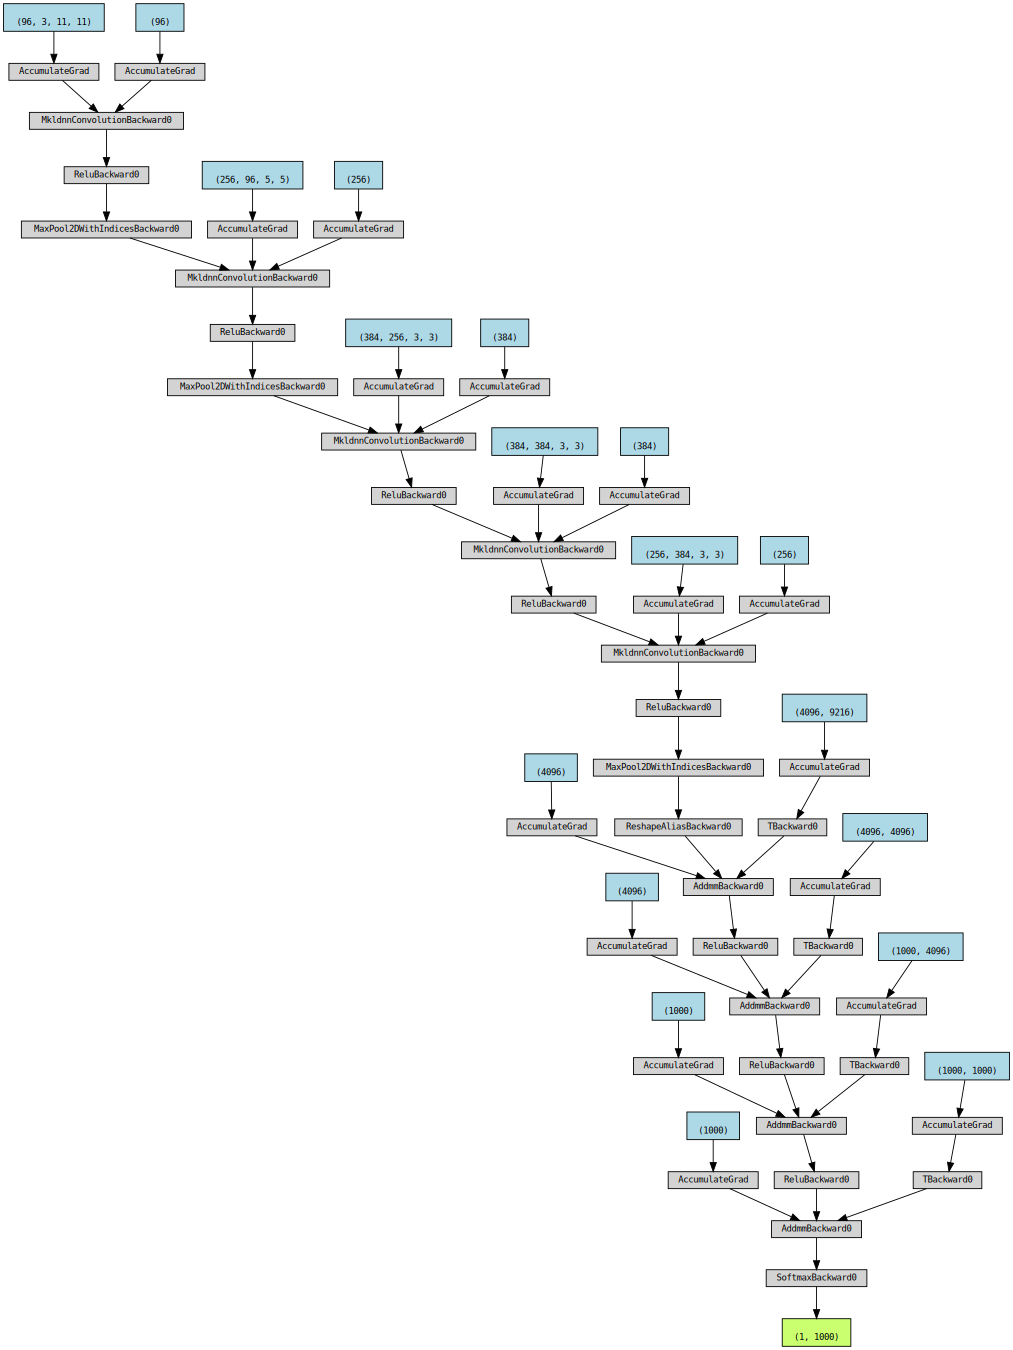

In [9]:
from torchviz import make_dot

x = torch.randn(1, 3, 227, 227)

model_2_cpu = AlexNet_2(num_classes = 1000)
model_2_cpu_out = model_2_cpu(x)

#g = make_dot(out, params=None)
#g.view()
make_dot(model_2_cpu_out, params = None)

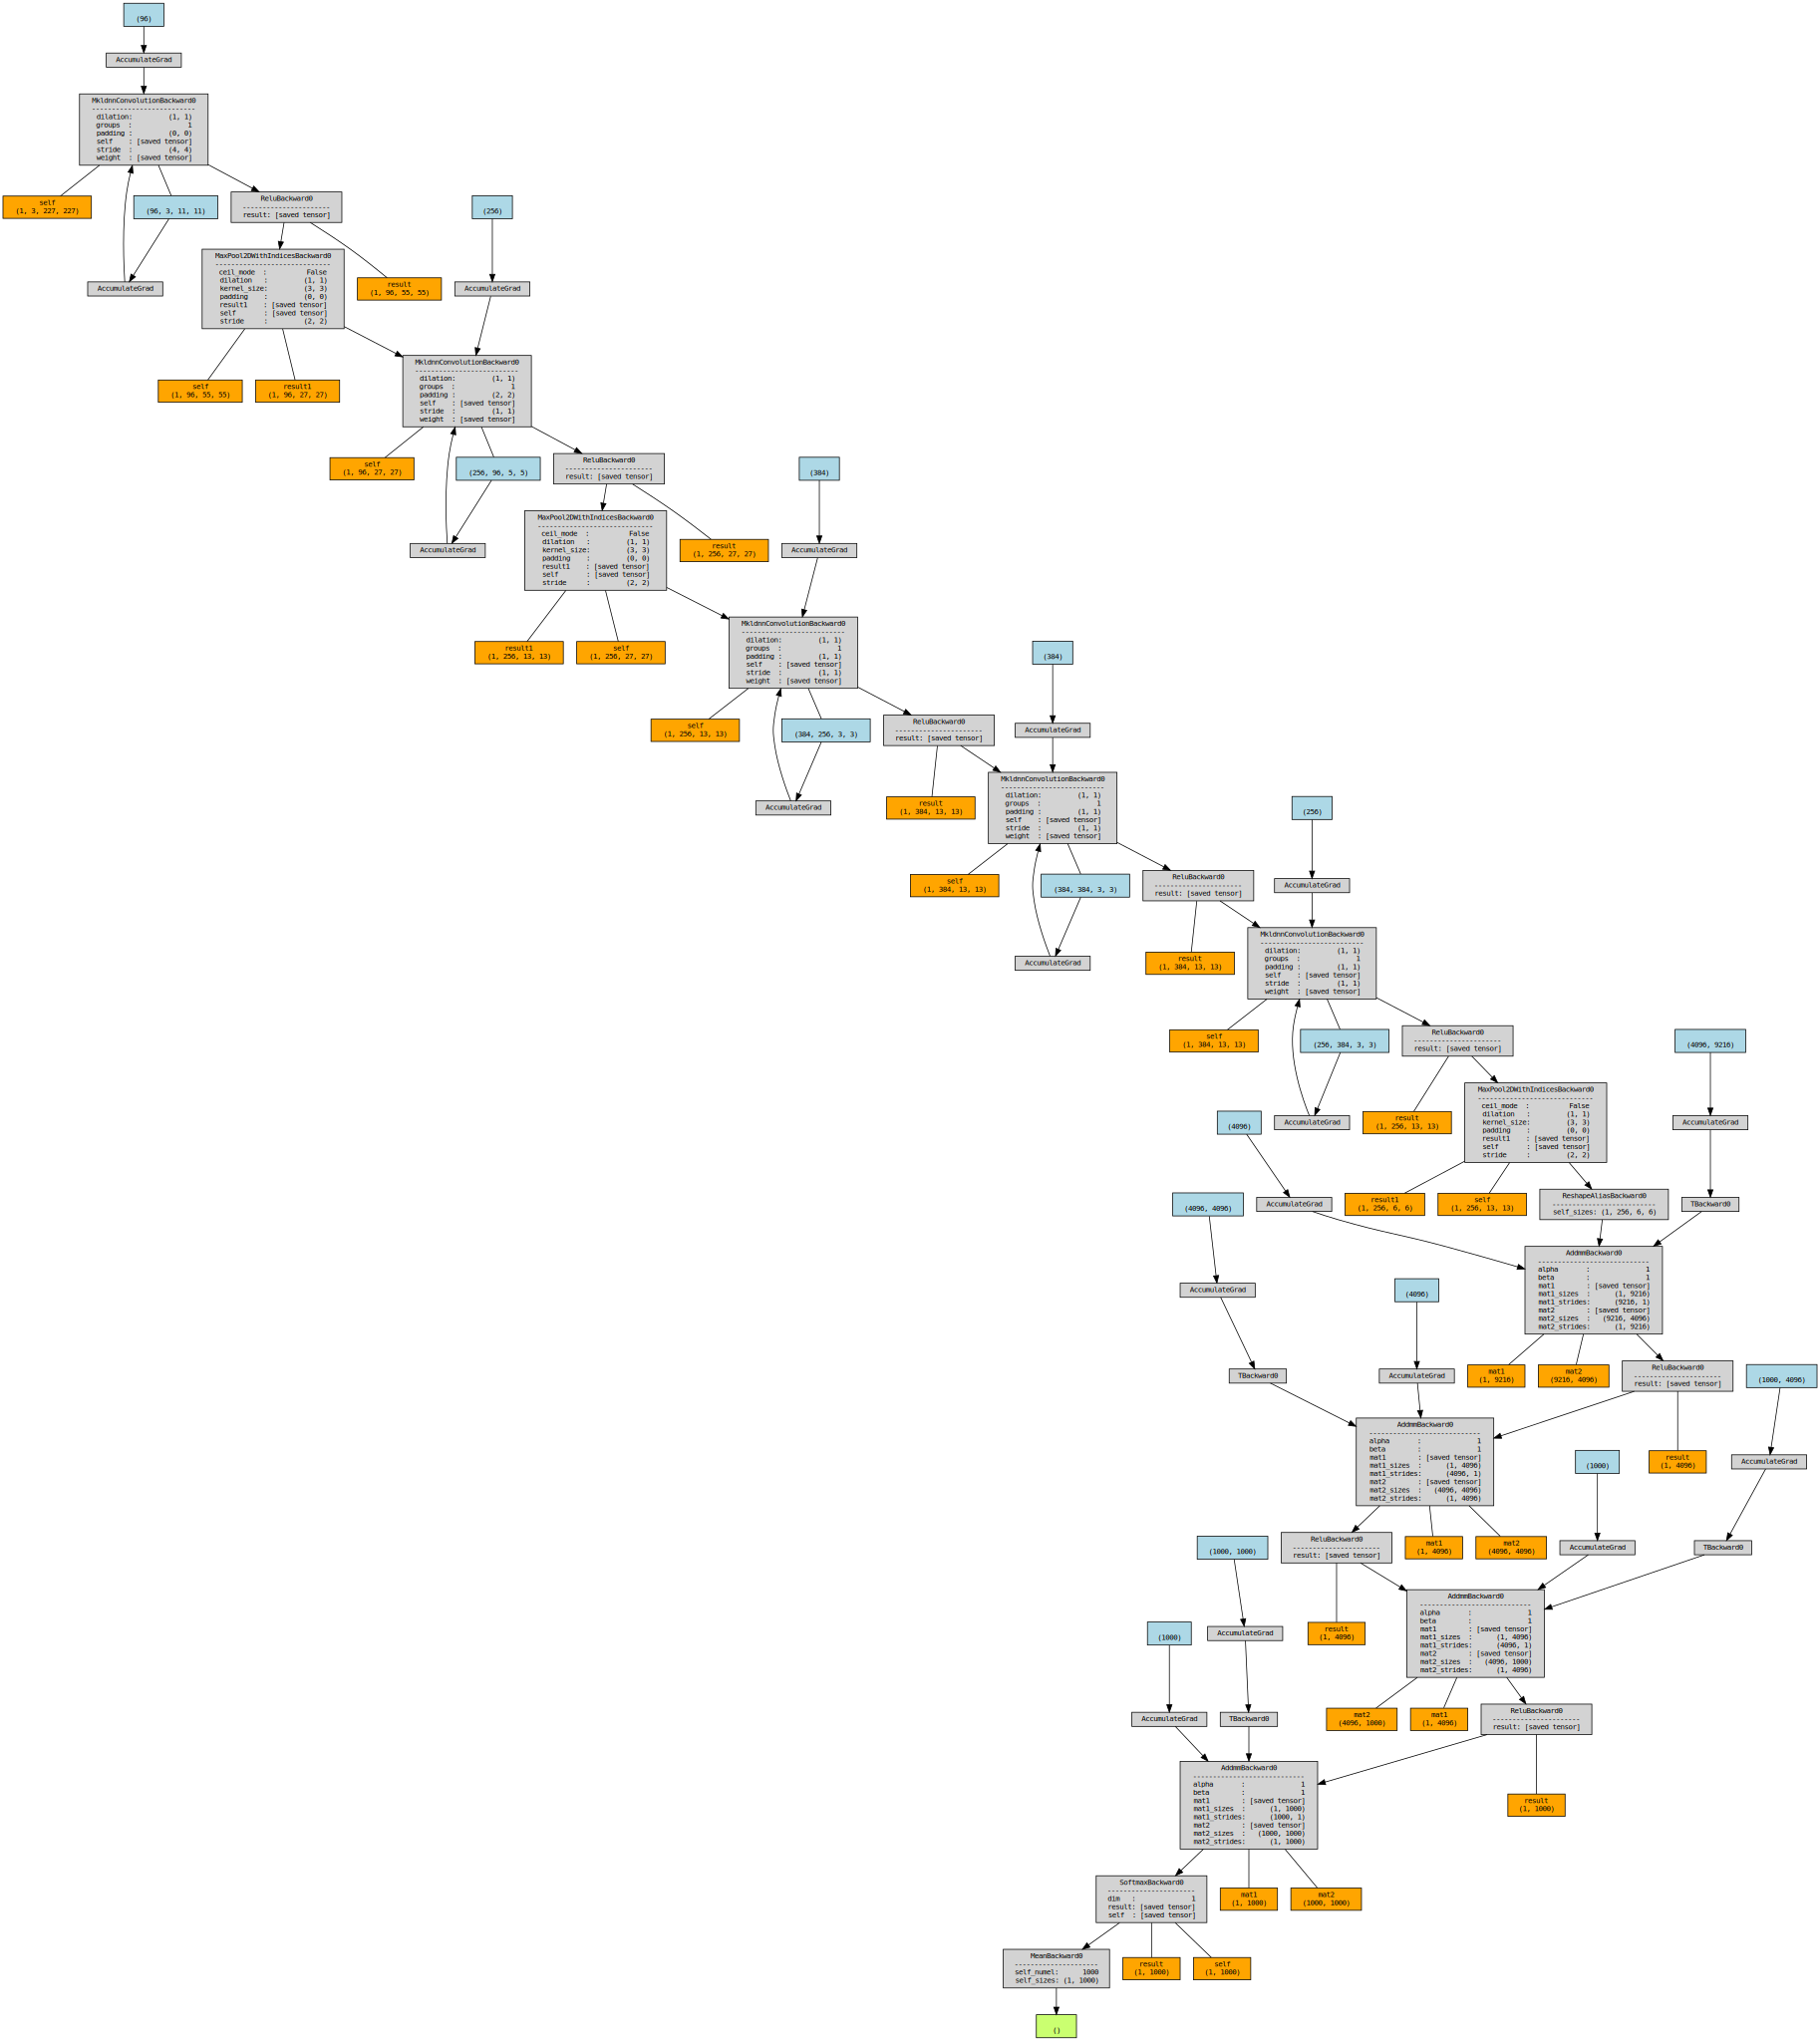

In [10]:
make_dot(model_2_cpu_out.mean(), params = None, show_attrs = True, show_saved = True)